In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
import tensorflow
print (tensorflow.__version__)

2.3.0


11493376/11490434 [==============================] - 0s 0us/step
Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


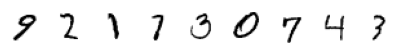

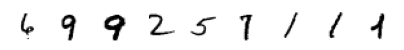

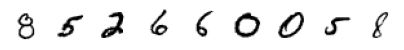

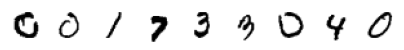

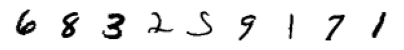

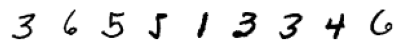

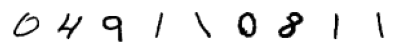

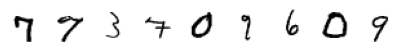

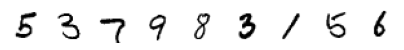

In [3]:
from tensorflow.keras.datasets import fashion_mnist, mnist

(trainX, trainY), (testX, testY) = mnist.load_data()

print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testY.shape))


for k in range(9):
    plt.figure(figsize=(7, 7))
    for j in range(9):
        i = np.random.randint(0, 10000)
        plt.subplot(990 + 1 + j)
        plt.imshow(trainX[i], cmap='gray_r')
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

In [4]:
trainX = [image/255.0 for image in trainX]
testX = [image/255.0 for image in testX]

trainX = np.reshape(trainX, (60000, 28, 28, 1))
testX = np.reshape(testX, (10000, 28, 28, 1))

print (trainX.shape, testX.shape, trainY.shape, testY.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


# Generator Model

In [5]:
random_input = tensorflow.keras.layers.Input(shape = 50)

x = tensorflow.keras.layers.Dense(1500, activation='relu')(random_input)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)
x = tensorflow.keras.layers.Dense(28*28)(x)
x = tensorflow.keras.layers.Reshape((28, 28, 1))(x)

generated_image = tensorflow.keras.layers.Activation('sigmoid')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense (Dense)                (None, 1500)              76500     
_________________________________________________________________
batch_normalization (BatchNo (None, 1500)              6000      
_________________________________________________________________
dense_1 (Dense)              (None, 784)               1176784   
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
activation (Activation)      (None, 28, 28, 1)         0         
Total params: 1,259,284
Trainable params: 1,256,284
Non-trainable params: 3,000
________________________________________

# Discriminator

In [6]:
image_input = tensorflow.keras.layers.Input(shape=(28, 28, 1))

x = tensorflow.keras.layers.Flatten()(image_input)
x = tensorflow.keras.layers.Dense(256, activation='relu')(x)
x = tensorflow.keras.layers.Dropout(0.5)(x)
x = tensorflow.keras.layers.Dense(128, activation='relu')(x)
x = tensorflow.keras.layers.Dropout(0.5)(x)
x = tensorflow.keras.layers.Dense(1)(x)

real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [7]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.00005, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# GAN

In [8]:
discriminator_network.trainable=False

g_output = generator_network(random_input)
d_output = discriminator_network(g_output)

gan_model = tensorflow.keras.models.Model(random_input, d_output)
gan_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
functional_1 (Functional)    (None, 28, 28, 1)         1259284   
_________________________________________________________________
functional_3 (Functional)    (None, 1)                 233985    
Total params: 1,493,269
Trainable params: 1,256,284
Non-trainable params: 236,985
_________________________________________________________________


# Compiling Models

In [9]:
gan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [10]:
# Indices of Zero Images
indices = [i for i in range(len(trainX))]

def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = trainX[np.array(random_indices),:]
    return real_images

def show_generator_results(generator_network):
    for k in range(9):
        plt.figure(figsize=(7, 7))
        fake_samples = get_fake_samples(generator_network, 9, noise_size)
        for j in range(9):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[j,:,:,-1], cmap='gray_r')
            plt.axis('off')
            #plt.title(trainY[i])
        plt.show()
    return

# Training GAN

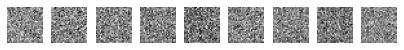

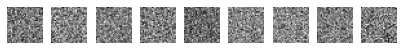

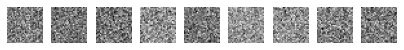

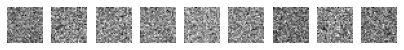

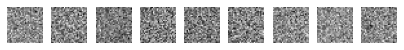

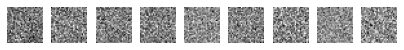

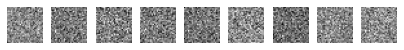

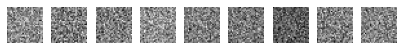

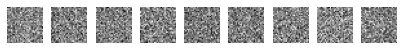

Epoch:0, Step:0, D-Loss:0.935, D-Acc:48.000, G-Loss:0.439
Epoch:0, Step:50, D-Loss:0.265, D-Acc:96.000, G-Loss:2.530
Epoch:0, Step:100, D-Loss:0.101, D-Acc:100.000, G-Loss:4.642
Epoch:0, Step:150, D-Loss:0.050, D-Acc:99.000, G-Loss:5.712
Epoch:0, Step:200, D-Loss:0.034, D-Acc:99.000, G-Loss:6.221
Epoch:0, Step:250, D-Loss:0.030, D-Acc:98.000, G-Loss:7.010
Epoch:0, Step:300, D-Loss:0.015, D-Acc:100.000, G-Loss:9.309
Epoch:0, Step:350, D-Loss:0.016, D-Acc:100.000, G-Loss:10.283
Epoch:0, Step:400, D-Loss:0.034, D-Acc:98.000, G-Loss:12.283
Epoch:0, Step:450, D-Loss:0.111, D-Acc:97.000, G-Loss:13.728
Epoch:1, Step:0, D-Loss:0.037, D-Acc:99.000, G-Loss:12.778
Epoch:1, Step:50, D-Loss:0.072, D-Acc:98.000, G-Loss:12.319
Epoch:1, Step:100, D-Loss:0.041, D-Acc:99.000, G-Loss:12.091
Epoch:1, Step:150, D-Loss:0.042, D-Acc:99.000, G-Loss:10.857
Epoch:1, Step:200, D-Loss:0.034, D-Acc:99.000, G-Loss:9.380
Epoch:1, Step:250, D-Loss:0.074, D-Acc:98.000, G-Loss:7.607
Epoch:1, Step:300, D-Loss:0.081, D-A

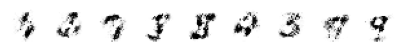

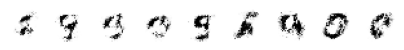

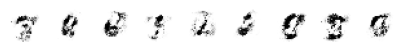

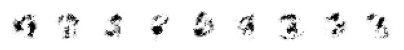

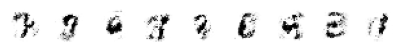

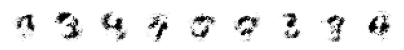

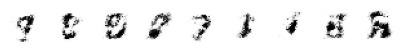

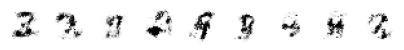

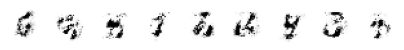

Epoch:10, Step:0, D-Loss:0.569, D-Acc:75.000, G-Loss:0.986
Epoch:10, Step:50, D-Loss:0.591, D-Acc:72.000, G-Loss:1.005
Epoch:10, Step:100, D-Loss:0.575, D-Acc:73.000, G-Loss:0.944
Epoch:10, Step:150, D-Loss:0.629, D-Acc:68.000, G-Loss:1.010
Epoch:10, Step:200, D-Loss:0.629, D-Acc:65.000, G-Loss:1.075
Epoch:10, Step:250, D-Loss:0.554, D-Acc:75.000, G-Loss:0.972
Epoch:10, Step:300, D-Loss:0.597, D-Acc:66.000, G-Loss:1.026
Epoch:10, Step:350, D-Loss:0.583, D-Acc:66.000, G-Loss:1.026
Epoch:10, Step:400, D-Loss:0.550, D-Acc:75.000, G-Loss:0.959
Epoch:10, Step:450, D-Loss:0.640, D-Acc:68.000, G-Loss:1.029
Epoch:11, Step:0, D-Loss:0.571, D-Acc:74.000, G-Loss:0.987
Epoch:11, Step:50, D-Loss:0.581, D-Acc:69.000, G-Loss:0.984
Epoch:11, Step:100, D-Loss:0.523, D-Acc:74.000, G-Loss:0.994
Epoch:11, Step:150, D-Loss:0.581, D-Acc:71.000, G-Loss:0.895
Epoch:11, Step:200, D-Loss:0.522, D-Acc:70.000, G-Loss:0.993
Epoch:11, Step:250, D-Loss:0.562, D-Acc:71.000, G-Loss:0.982
Epoch:11, Step:300, D-Loss:0.6

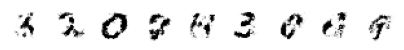

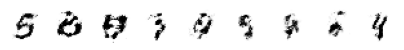

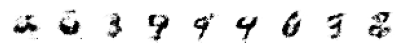

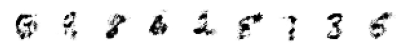

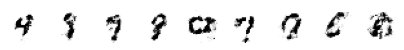

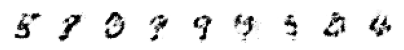

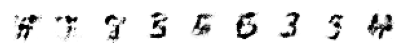

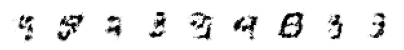

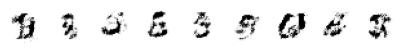

Epoch:20, Step:0, D-Loss:0.591, D-Acc:67.000, G-Loss:1.117
Epoch:20, Step:50, D-Loss:0.596, D-Acc:67.000, G-Loss:1.135
Epoch:20, Step:100, D-Loss:0.527, D-Acc:75.000, G-Loss:1.169
Epoch:20, Step:150, D-Loss:0.541, D-Acc:78.000, G-Loss:1.107
Epoch:20, Step:200, D-Loss:0.555, D-Acc:75.000, G-Loss:1.051
Epoch:20, Step:250, D-Loss:0.575, D-Acc:72.000, G-Loss:1.051
Epoch:20, Step:300, D-Loss:0.551, D-Acc:71.000, G-Loss:1.064
Epoch:20, Step:350, D-Loss:0.543, D-Acc:72.000, G-Loss:1.029
Epoch:20, Step:400, D-Loss:0.581, D-Acc:69.000, G-Loss:1.038
Epoch:20, Step:450, D-Loss:0.517, D-Acc:78.000, G-Loss:1.032
Epoch:21, Step:0, D-Loss:0.527, D-Acc:76.000, G-Loss:1.016
Epoch:21, Step:50, D-Loss:0.537, D-Acc:74.000, G-Loss:1.060
Epoch:21, Step:100, D-Loss:0.543, D-Acc:74.000, G-Loss:1.048
Epoch:21, Step:150, D-Loss:0.570, D-Acc:70.000, G-Loss:1.015
Epoch:21, Step:200, D-Loss:0.563, D-Acc:70.000, G-Loss:1.118
Epoch:21, Step:250, D-Loss:0.540, D-Acc:75.000, G-Loss:0.999
Epoch:21, Step:300, D-Loss:0.5

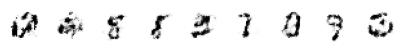

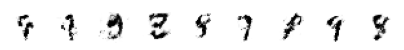

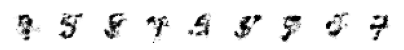

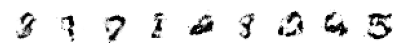

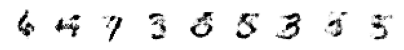

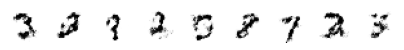

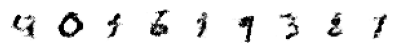

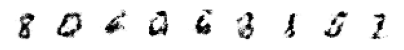

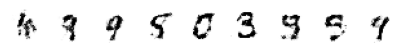

Epoch:30, Step:0, D-Loss:0.585, D-Acc:67.000, G-Loss:1.048
Epoch:30, Step:50, D-Loss:0.579, D-Acc:68.000, G-Loss:1.062
Epoch:30, Step:100, D-Loss:0.491, D-Acc:76.000, G-Loss:0.972
Epoch:30, Step:150, D-Loss:0.641, D-Acc:57.000, G-Loss:1.055
Epoch:30, Step:200, D-Loss:0.535, D-Acc:77.000, G-Loss:1.100
Epoch:30, Step:250, D-Loss:0.614, D-Acc:68.000, G-Loss:1.033
Epoch:30, Step:300, D-Loss:0.579, D-Acc:67.000, G-Loss:1.098
Epoch:30, Step:350, D-Loss:0.581, D-Acc:71.000, G-Loss:0.932
Epoch:30, Step:400, D-Loss:0.578, D-Acc:71.000, G-Loss:1.023
Epoch:30, Step:450, D-Loss:0.608, D-Acc:66.000, G-Loss:1.058
Epoch:31, Step:0, D-Loss:0.532, D-Acc:72.000, G-Loss:1.040
Epoch:31, Step:50, D-Loss:0.578, D-Acc:73.000, G-Loss:1.029
Epoch:31, Step:100, D-Loss:0.674, D-Acc:59.000, G-Loss:0.991
Epoch:31, Step:150, D-Loss:0.585, D-Acc:67.000, G-Loss:1.018
Epoch:31, Step:200, D-Loss:0.672, D-Acc:67.000, G-Loss:0.917
Epoch:31, Step:250, D-Loss:0.610, D-Acc:69.000, G-Loss:1.064
Epoch:31, Step:300, D-Loss:0.5

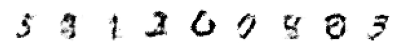

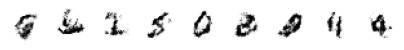

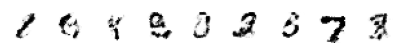

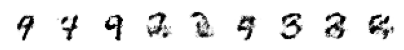

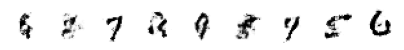

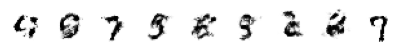

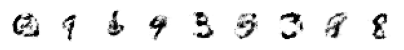

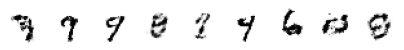

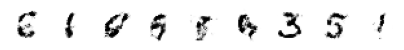

Epoch:40, Step:0, D-Loss:0.656, D-Acc:64.000, G-Loss:0.993
Epoch:40, Step:50, D-Loss:0.601, D-Acc:68.000, G-Loss:0.954
Epoch:40, Step:100, D-Loss:0.579, D-Acc:70.000, G-Loss:0.994
Epoch:40, Step:150, D-Loss:0.603, D-Acc:67.000, G-Loss:0.911
Epoch:40, Step:200, D-Loss:0.547, D-Acc:74.000, G-Loss:1.020
Epoch:40, Step:250, D-Loss:0.634, D-Acc:62.000, G-Loss:0.959
Epoch:40, Step:300, D-Loss:0.611, D-Acc:69.000, G-Loss:0.982
Epoch:40, Step:350, D-Loss:0.601, D-Acc:67.000, G-Loss:0.949
Epoch:40, Step:400, D-Loss:0.549, D-Acc:73.000, G-Loss:0.909
Epoch:40, Step:450, D-Loss:0.594, D-Acc:63.000, G-Loss:0.949
Epoch:41, Step:0, D-Loss:0.493, D-Acc:74.000, G-Loss:0.949
Epoch:41, Step:50, D-Loss:0.605, D-Acc:69.000, G-Loss:0.891
Epoch:41, Step:100, D-Loss:0.574, D-Acc:71.000, G-Loss:0.995
Epoch:41, Step:150, D-Loss:0.623, D-Acc:62.000, G-Loss:1.011
Epoch:41, Step:200, D-Loss:0.584, D-Acc:68.000, G-Loss:1.012
Epoch:41, Step:250, D-Loss:0.560, D-Acc:71.000, G-Loss:0.937
Epoch:41, Step:300, D-Loss:0.6

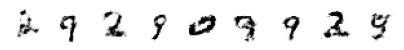

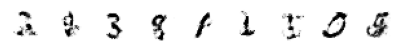

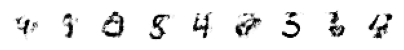

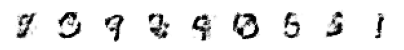

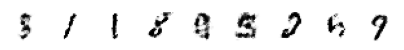

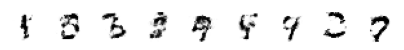

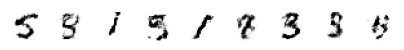

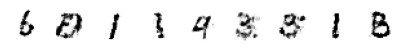

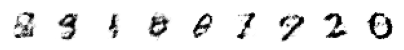

Epoch:50, Step:0, D-Loss:0.616, D-Acc:66.000, G-Loss:0.959
Epoch:50, Step:50, D-Loss:0.570, D-Acc:70.000, G-Loss:0.930
Epoch:50, Step:100, D-Loss:0.617, D-Acc:71.000, G-Loss:0.938
Epoch:50, Step:150, D-Loss:0.664, D-Acc:61.000, G-Loss:0.908
Epoch:50, Step:200, D-Loss:0.576, D-Acc:73.000, G-Loss:0.925
Epoch:50, Step:250, D-Loss:0.554, D-Acc:71.000, G-Loss:0.946
Epoch:50, Step:300, D-Loss:0.626, D-Acc:61.000, G-Loss:0.950
Epoch:50, Step:350, D-Loss:0.537, D-Acc:75.000, G-Loss:1.004
Epoch:50, Step:400, D-Loss:0.623, D-Acc:67.000, G-Loss:1.083
Epoch:50, Step:450, D-Loss:0.572, D-Acc:69.000, G-Loss:0.910
Epoch:51, Step:0, D-Loss:0.612, D-Acc:62.000, G-Loss:0.934
Epoch:51, Step:50, D-Loss:0.554, D-Acc:68.000, G-Loss:0.927
Epoch:51, Step:100, D-Loss:0.682, D-Acc:57.000, G-Loss:0.947
Epoch:51, Step:150, D-Loss:0.579, D-Acc:67.000, G-Loss:0.915
Epoch:51, Step:200, D-Loss:0.605, D-Acc:66.000, G-Loss:0.975
Epoch:51, Step:250, D-Loss:0.693, D-Acc:59.000, G-Loss:0.930
Epoch:51, Step:300, D-Loss:0.6

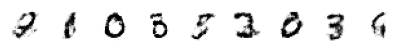

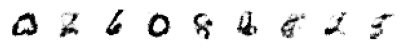

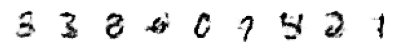

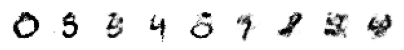

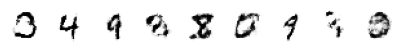

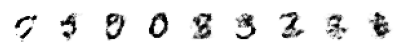

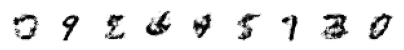

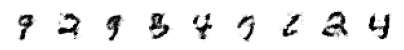

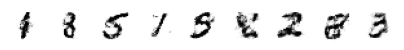

Epoch:60, Step:0, D-Loss:0.635, D-Acc:64.000, G-Loss:1.026
Epoch:60, Step:50, D-Loss:0.513, D-Acc:78.000, G-Loss:0.878
Epoch:60, Step:100, D-Loss:0.617, D-Acc:65.000, G-Loss:0.952
Epoch:60, Step:150, D-Loss:0.687, D-Acc:60.000, G-Loss:0.989
Epoch:60, Step:200, D-Loss:0.645, D-Acc:57.000, G-Loss:0.945
Epoch:60, Step:250, D-Loss:0.591, D-Acc:63.000, G-Loss:0.954
Epoch:60, Step:300, D-Loss:0.576, D-Acc:70.000, G-Loss:1.025
Epoch:60, Step:350, D-Loss:0.589, D-Acc:69.000, G-Loss:0.930
Epoch:60, Step:400, D-Loss:0.592, D-Acc:67.000, G-Loss:0.965
Epoch:60, Step:450, D-Loss:0.609, D-Acc:67.000, G-Loss:0.996
Epoch:61, Step:0, D-Loss:0.569, D-Acc:72.000, G-Loss:0.909
Epoch:61, Step:50, D-Loss:0.600, D-Acc:72.000, G-Loss:0.952
Epoch:61, Step:100, D-Loss:0.643, D-Acc:58.000, G-Loss:0.990
Epoch:61, Step:150, D-Loss:0.603, D-Acc:70.000, G-Loss:0.972
Epoch:61, Step:200, D-Loss:0.564, D-Acc:71.000, G-Loss:1.012
Epoch:61, Step:250, D-Loss:0.642, D-Acc:61.000, G-Loss:0.919
Epoch:61, Step:300, D-Loss:0.6

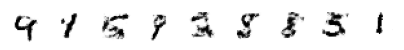

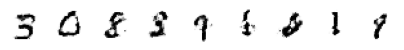

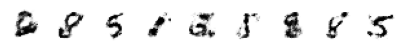

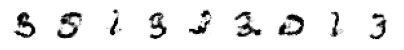

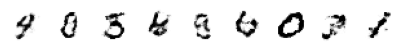

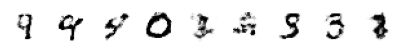

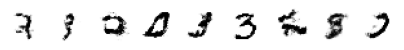

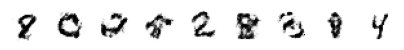

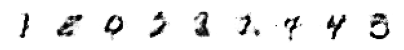

Epoch:70, Step:0, D-Loss:0.635, D-Acc:65.000, G-Loss:0.993
Epoch:70, Step:50, D-Loss:0.574, D-Acc:73.000, G-Loss:0.966
Epoch:70, Step:100, D-Loss:0.564, D-Acc:72.000, G-Loss:0.938
Epoch:70, Step:150, D-Loss:0.619, D-Acc:60.000, G-Loss:0.950
Epoch:70, Step:200, D-Loss:0.646, D-Acc:65.000, G-Loss:0.958
Epoch:70, Step:250, D-Loss:0.664, D-Acc:64.000, G-Loss:0.942
Epoch:70, Step:300, D-Loss:0.556, D-Acc:77.000, G-Loss:0.961
Epoch:70, Step:350, D-Loss:0.589, D-Acc:75.000, G-Loss:1.020
Epoch:70, Step:400, D-Loss:0.546, D-Acc:73.000, G-Loss:1.023
Epoch:70, Step:450, D-Loss:0.558, D-Acc:74.000, G-Loss:0.987
Epoch:71, Step:0, D-Loss:0.604, D-Acc:68.000, G-Loss:0.896
Epoch:71, Step:50, D-Loss:0.585, D-Acc:68.000, G-Loss:0.962
Epoch:71, Step:100, D-Loss:0.604, D-Acc:67.000, G-Loss:0.972
Epoch:71, Step:150, D-Loss:0.615, D-Acc:68.000, G-Loss:1.024
Epoch:71, Step:200, D-Loss:0.636, D-Acc:68.000, G-Loss:0.981
Epoch:71, Step:250, D-Loss:0.519, D-Acc:76.000, G-Loss:0.942
Epoch:71, Step:300, D-Loss:0.5

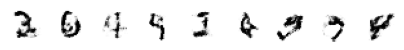

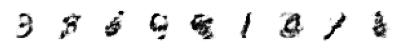

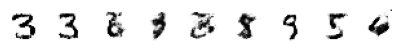

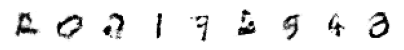

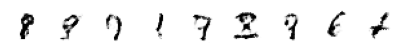

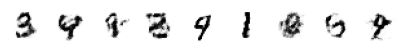

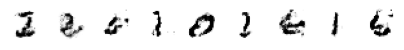

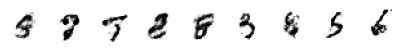

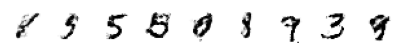

Epoch:80, Step:0, D-Loss:0.652, D-Acc:64.000, G-Loss:1.056
Epoch:80, Step:50, D-Loss:0.611, D-Acc:65.000, G-Loss:0.990
Epoch:80, Step:100, D-Loss:0.616, D-Acc:69.000, G-Loss:0.995
Epoch:80, Step:150, D-Loss:0.630, D-Acc:62.000, G-Loss:1.030
Epoch:80, Step:200, D-Loss:0.605, D-Acc:66.000, G-Loss:1.050
Epoch:80, Step:250, D-Loss:0.568, D-Acc:75.000, G-Loss:0.979
Epoch:80, Step:300, D-Loss:0.593, D-Acc:68.000, G-Loss:0.972
Epoch:80, Step:350, D-Loss:0.571, D-Acc:71.000, G-Loss:0.927
Epoch:80, Step:400, D-Loss:0.491, D-Acc:81.000, G-Loss:0.954
Epoch:80, Step:450, D-Loss:0.629, D-Acc:70.000, G-Loss:1.007
Epoch:81, Step:0, D-Loss:0.608, D-Acc:68.000, G-Loss:1.038
Epoch:81, Step:50, D-Loss:0.632, D-Acc:66.000, G-Loss:1.037
Epoch:81, Step:100, D-Loss:0.598, D-Acc:66.000, G-Loss:1.008
Epoch:81, Step:150, D-Loss:0.625, D-Acc:68.000, G-Loss:1.010
Epoch:81, Step:200, D-Loss:0.574, D-Acc:66.000, G-Loss:1.111
Epoch:81, Step:250, D-Loss:0.517, D-Acc:77.000, G-Loss:1.009
Epoch:81, Step:300, D-Loss:0.5

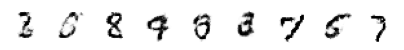

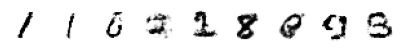

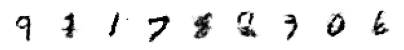

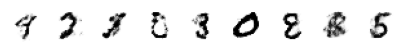

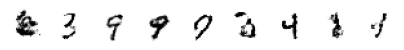

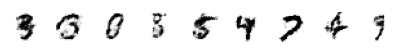

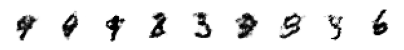

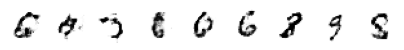

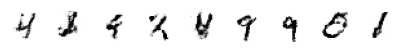

Epoch:90, Step:0, D-Loss:0.588, D-Acc:72.000, G-Loss:0.942
Epoch:90, Step:50, D-Loss:0.586, D-Acc:69.000, G-Loss:1.018
Epoch:90, Step:100, D-Loss:0.473, D-Acc:78.000, G-Loss:1.009
Epoch:90, Step:150, D-Loss:0.584, D-Acc:70.000, G-Loss:1.007
Epoch:90, Step:200, D-Loss:0.641, D-Acc:62.000, G-Loss:0.980
Epoch:90, Step:250, D-Loss:0.620, D-Acc:65.000, G-Loss:1.051
Epoch:90, Step:300, D-Loss:0.621, D-Acc:66.000, G-Loss:0.935
Epoch:90, Step:350, D-Loss:0.543, D-Acc:74.000, G-Loss:1.017
Epoch:90, Step:400, D-Loss:0.605, D-Acc:67.000, G-Loss:0.963
Epoch:90, Step:450, D-Loss:0.549, D-Acc:71.000, G-Loss:1.013
Epoch:91, Step:0, D-Loss:0.539, D-Acc:74.000, G-Loss:1.052
Epoch:91, Step:50, D-Loss:0.590, D-Acc:70.000, G-Loss:1.076
Epoch:91, Step:100, D-Loss:0.546, D-Acc:75.000, G-Loss:1.080
Epoch:91, Step:150, D-Loss:0.603, D-Acc:67.000, G-Loss:1.018
Epoch:91, Step:200, D-Loss:0.546, D-Acc:65.000, G-Loss:1.064
Epoch:91, Step:250, D-Loss:0.573, D-Acc:68.000, G-Loss:1.057
Epoch:91, Step:300, D-Loss:0.5

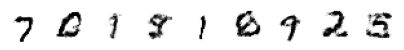

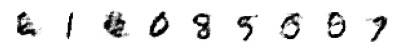

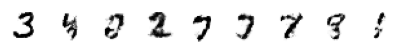

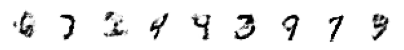

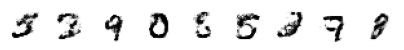

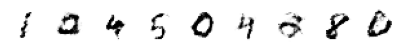

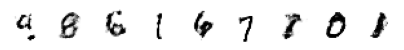

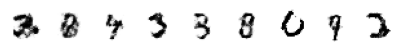

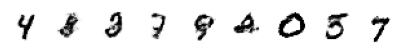

Epoch:100, Step:0, D-Loss:0.668, D-Acc:64.000, G-Loss:1.037
Epoch:100, Step:50, D-Loss:0.538, D-Acc:71.000, G-Loss:1.038
Epoch:100, Step:100, D-Loss:0.562, D-Acc:73.000, G-Loss:1.066
Epoch:100, Step:150, D-Loss:0.578, D-Acc:61.000, G-Loss:1.096
Epoch:100, Step:200, D-Loss:0.524, D-Acc:75.000, G-Loss:1.080
Epoch:100, Step:250, D-Loss:0.622, D-Acc:59.000, G-Loss:1.029
Epoch:100, Step:300, D-Loss:0.577, D-Acc:68.000, G-Loss:1.003
Epoch:100, Step:350, D-Loss:0.583, D-Acc:68.000, G-Loss:1.069
Epoch:100, Step:400, D-Loss:0.570, D-Acc:72.000, G-Loss:1.029
Epoch:100, Step:450, D-Loss:0.577, D-Acc:73.000, G-Loss:0.999
Epoch:101, Step:0, D-Loss:0.587, D-Acc:68.000, G-Loss:1.020
Epoch:101, Step:50, D-Loss:0.549, D-Acc:77.000, G-Loss:0.973
Epoch:101, Step:100, D-Loss:0.568, D-Acc:72.000, G-Loss:1.043
Epoch:101, Step:150, D-Loss:0.559, D-Acc:75.000, G-Loss:1.072
Epoch:101, Step:200, D-Loss:0.580, D-Acc:73.000, G-Loss:1.124
Epoch:101, Step:250, D-Loss:0.564, D-Acc:73.000, G-Loss:1.062
Epoch:101, Ste

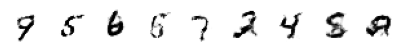

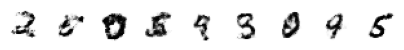

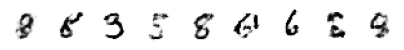

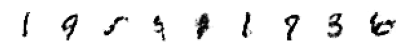

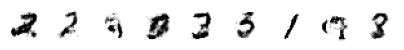

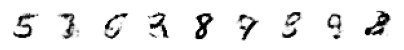

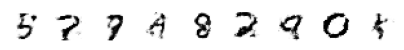

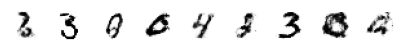

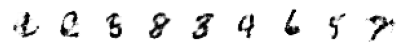

Epoch:110, Step:0, D-Loss:0.587, D-Acc:69.000, G-Loss:1.041
Epoch:110, Step:50, D-Loss:0.564, D-Acc:72.000, G-Loss:1.027
Epoch:110, Step:100, D-Loss:0.570, D-Acc:71.000, G-Loss:1.023
Epoch:110, Step:150, D-Loss:0.603, D-Acc:69.000, G-Loss:1.146
Epoch:110, Step:200, D-Loss:0.543, D-Acc:75.000, G-Loss:1.028
Epoch:110, Step:250, D-Loss:0.587, D-Acc:66.000, G-Loss:0.968
Epoch:110, Step:300, D-Loss:0.527, D-Acc:79.000, G-Loss:1.202
Epoch:110, Step:350, D-Loss:0.583, D-Acc:67.000, G-Loss:1.127
Epoch:110, Step:400, D-Loss:0.566, D-Acc:67.000, G-Loss:1.163
Epoch:110, Step:450, D-Loss:0.613, D-Acc:70.000, G-Loss:1.049
Epoch:111, Step:0, D-Loss:0.551, D-Acc:70.000, G-Loss:1.112
Epoch:111, Step:50, D-Loss:0.599, D-Acc:69.000, G-Loss:1.085
Epoch:111, Step:100, D-Loss:0.596, D-Acc:67.000, G-Loss:1.008
Epoch:111, Step:150, D-Loss:0.512, D-Acc:74.000, G-Loss:1.120
Epoch:111, Step:200, D-Loss:0.537, D-Acc:72.000, G-Loss:1.091
Epoch:111, Step:250, D-Loss:0.584, D-Acc:68.000, G-Loss:0.969
Epoch:111, Ste

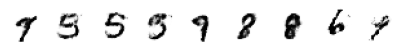

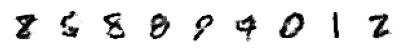

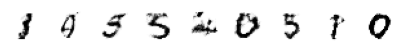

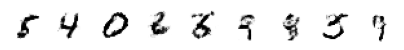

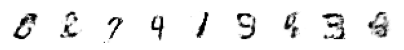

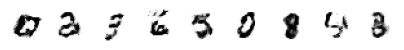

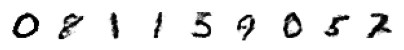

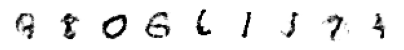

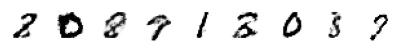

Epoch:120, Step:0, D-Loss:0.642, D-Acc:70.000, G-Loss:1.127
Epoch:120, Step:50, D-Loss:0.579, D-Acc:74.000, G-Loss:1.041
Epoch:120, Step:100, D-Loss:0.526, D-Acc:75.000, G-Loss:1.060
Epoch:120, Step:150, D-Loss:0.640, D-Acc:62.000, G-Loss:1.091
Epoch:120, Step:200, D-Loss:0.610, D-Acc:62.000, G-Loss:1.134
Epoch:120, Step:250, D-Loss:0.579, D-Acc:70.000, G-Loss:1.142
Epoch:120, Step:300, D-Loss:0.550, D-Acc:68.000, G-Loss:1.098
Epoch:120, Step:350, D-Loss:0.554, D-Acc:68.000, G-Loss:1.068
Epoch:120, Step:400, D-Loss:0.580, D-Acc:69.000, G-Loss:1.083
Epoch:120, Step:450, D-Loss:0.536, D-Acc:75.000, G-Loss:1.099
Epoch:121, Step:0, D-Loss:0.554, D-Acc:73.000, G-Loss:1.080
Epoch:121, Step:50, D-Loss:0.570, D-Acc:64.000, G-Loss:1.047
Epoch:121, Step:100, D-Loss:0.497, D-Acc:75.000, G-Loss:1.091
Epoch:121, Step:150, D-Loss:0.553, D-Acc:71.000, G-Loss:1.056
Epoch:121, Step:200, D-Loss:0.506, D-Acc:71.000, G-Loss:1.149
Epoch:121, Step:250, D-Loss:0.535, D-Acc:75.000, G-Loss:1.132
Epoch:121, Ste

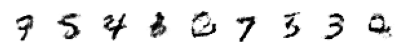

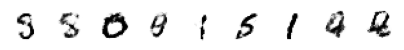

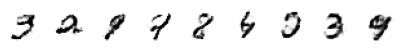

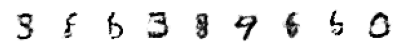

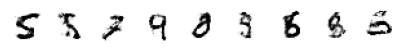

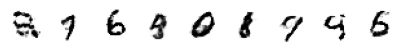

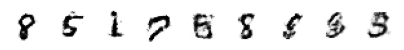

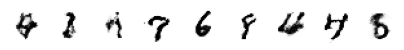

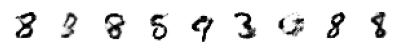

Epoch:130, Step:0, D-Loss:0.560, D-Acc:71.000, G-Loss:1.071
Epoch:130, Step:50, D-Loss:0.503, D-Acc:75.000, G-Loss:1.160
Epoch:130, Step:100, D-Loss:0.531, D-Acc:76.000, G-Loss:1.078
Epoch:130, Step:150, D-Loss:0.518, D-Acc:78.000, G-Loss:1.195
Epoch:130, Step:200, D-Loss:0.532, D-Acc:79.000, G-Loss:1.136
Epoch:130, Step:250, D-Loss:0.583, D-Acc:65.000, G-Loss:1.031
Epoch:130, Step:300, D-Loss:0.481, D-Acc:80.000, G-Loss:1.181
Epoch:130, Step:350, D-Loss:0.495, D-Acc:78.000, G-Loss:1.207
Epoch:130, Step:400, D-Loss:0.497, D-Acc:73.000, G-Loss:1.155
Epoch:130, Step:450, D-Loss:0.564, D-Acc:69.000, G-Loss:1.071
Epoch:131, Step:0, D-Loss:0.575, D-Acc:66.000, G-Loss:1.167
Epoch:131, Step:50, D-Loss:0.576, D-Acc:69.000, G-Loss:1.127
Epoch:131, Step:100, D-Loss:0.507, D-Acc:74.000, G-Loss:1.041
Epoch:131, Step:150, D-Loss:0.555, D-Acc:69.000, G-Loss:1.104
Epoch:131, Step:200, D-Loss:0.526, D-Acc:78.000, G-Loss:1.109
Epoch:131, Step:250, D-Loss:0.533, D-Acc:74.000, G-Loss:1.154
Epoch:131, Ste

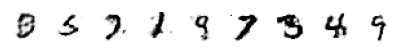

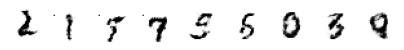

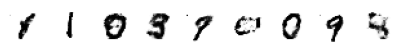

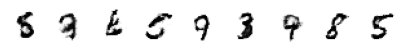

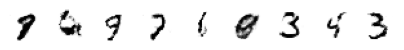

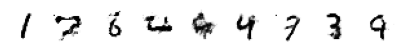

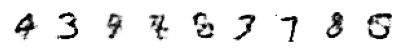

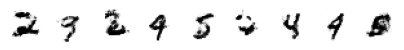

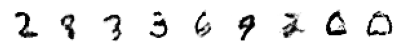

Epoch:140, Step:0, D-Loss:0.420, D-Acc:83.000, G-Loss:1.273
Epoch:140, Step:50, D-Loss:0.549, D-Acc:67.000, G-Loss:1.224
Epoch:140, Step:100, D-Loss:0.580, D-Acc:70.000, G-Loss:1.143
Epoch:140, Step:150, D-Loss:0.554, D-Acc:68.000, G-Loss:1.287
Epoch:140, Step:200, D-Loss:0.578, D-Acc:71.000, G-Loss:1.198
Epoch:140, Step:250, D-Loss:0.565, D-Acc:68.000, G-Loss:1.089
Epoch:140, Step:300, D-Loss:0.562, D-Acc:66.000, G-Loss:1.204
Epoch:140, Step:350, D-Loss:0.640, D-Acc:67.000, G-Loss:1.086
Epoch:140, Step:400, D-Loss:0.644, D-Acc:63.000, G-Loss:1.215
Epoch:140, Step:450, D-Loss:0.546, D-Acc:71.000, G-Loss:1.170
Epoch:141, Step:0, D-Loss:0.503, D-Acc:72.000, G-Loss:1.266
Epoch:141, Step:50, D-Loss:0.604, D-Acc:72.000, G-Loss:1.194
Epoch:141, Step:100, D-Loss:0.521, D-Acc:75.000, G-Loss:1.164
Epoch:141, Step:150, D-Loss:0.501, D-Acc:74.000, G-Loss:1.156
Epoch:141, Step:200, D-Loss:0.510, D-Acc:76.000, G-Loss:1.110
Epoch:141, Step:250, D-Loss:0.557, D-Acc:74.000, G-Loss:1.124
Epoch:141, Ste

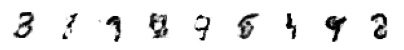

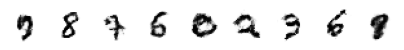

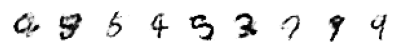

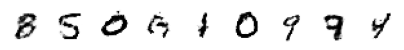

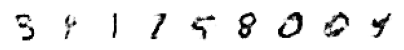

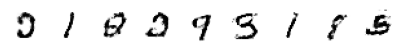

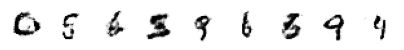

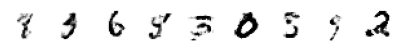

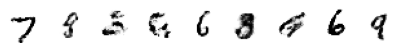

Epoch:150, Step:0, D-Loss:0.626, D-Acc:69.000, G-Loss:1.061
Epoch:150, Step:50, D-Loss:0.519, D-Acc:73.000, G-Loss:1.075
Epoch:150, Step:100, D-Loss:0.628, D-Acc:64.000, G-Loss:1.153
Epoch:150, Step:150, D-Loss:0.582, D-Acc:71.000, G-Loss:1.022
Epoch:150, Step:200, D-Loss:0.561, D-Acc:76.000, G-Loss:1.215
Epoch:150, Step:250, D-Loss:0.558, D-Acc:71.000, G-Loss:1.212
Epoch:150, Step:300, D-Loss:0.497, D-Acc:72.000, G-Loss:1.202
Epoch:150, Step:350, D-Loss:0.530, D-Acc:78.000, G-Loss:1.297
Epoch:150, Step:400, D-Loss:0.505, D-Acc:75.000, G-Loss:1.277
Epoch:150, Step:450, D-Loss:0.471, D-Acc:76.000, G-Loss:1.110
Epoch:151, Step:0, D-Loss:0.496, D-Acc:76.000, G-Loss:1.114
Epoch:151, Step:50, D-Loss:0.516, D-Acc:75.000, G-Loss:1.238
Epoch:151, Step:100, D-Loss:0.649, D-Acc:63.000, G-Loss:1.091
Epoch:151, Step:150, D-Loss:0.557, D-Acc:66.000, G-Loss:1.251
Epoch:151, Step:200, D-Loss:0.515, D-Acc:75.000, G-Loss:1.106
Epoch:151, Step:250, D-Loss:0.526, D-Acc:69.000, G-Loss:1.108
Epoch:151, Ste

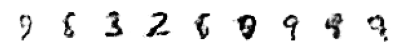

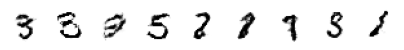

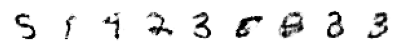

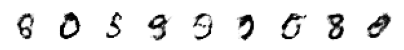

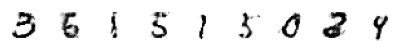

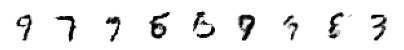

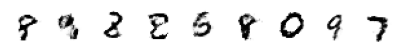

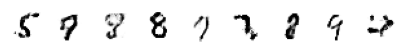

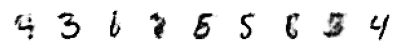

Epoch:160, Step:0, D-Loss:0.511, D-Acc:74.000, G-Loss:1.046
Epoch:160, Step:50, D-Loss:0.553, D-Acc:71.000, G-Loss:1.133
Epoch:160, Step:100, D-Loss:0.587, D-Acc:72.000, G-Loss:1.193
Epoch:160, Step:150, D-Loss:0.618, D-Acc:70.000, G-Loss:1.141
Epoch:160, Step:200, D-Loss:0.500, D-Acc:74.000, G-Loss:1.212
Epoch:160, Step:250, D-Loss:0.533, D-Acc:75.000, G-Loss:1.333
Epoch:160, Step:300, D-Loss:0.518, D-Acc:75.000, G-Loss:1.230
Epoch:160, Step:350, D-Loss:0.500, D-Acc:74.000, G-Loss:1.188
Epoch:160, Step:400, D-Loss:0.486, D-Acc:80.000, G-Loss:1.081
Epoch:160, Step:450, D-Loss:0.548, D-Acc:71.000, G-Loss:1.169
Epoch:161, Step:0, D-Loss:0.546, D-Acc:70.000, G-Loss:1.165
Epoch:161, Step:50, D-Loss:0.595, D-Acc:72.000, G-Loss:1.228
Epoch:161, Step:100, D-Loss:0.518, D-Acc:76.000, G-Loss:1.132
Epoch:161, Step:150, D-Loss:0.472, D-Acc:77.000, G-Loss:1.170
Epoch:161, Step:200, D-Loss:0.557, D-Acc:65.000, G-Loss:1.249
Epoch:161, Step:250, D-Loss:0.575, D-Acc:69.000, G-Loss:1.195
Epoch:161, Ste

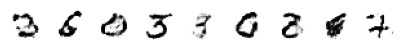

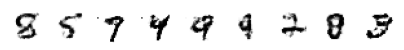

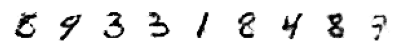

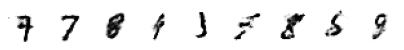

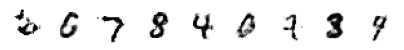

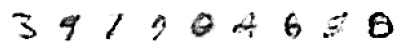

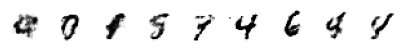

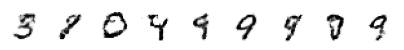

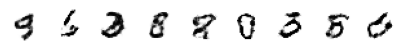

Epoch:170, Step:0, D-Loss:0.670, D-Acc:60.000, G-Loss:1.216
Epoch:170, Step:50, D-Loss:0.643, D-Acc:66.000, G-Loss:1.182
Epoch:170, Step:100, D-Loss:0.580, D-Acc:69.000, G-Loss:1.159
Epoch:170, Step:150, D-Loss:0.573, D-Acc:72.000, G-Loss:1.178
Epoch:170, Step:200, D-Loss:0.581, D-Acc:70.000, G-Loss:1.227
Epoch:170, Step:250, D-Loss:0.598, D-Acc:66.000, G-Loss:1.222
Epoch:170, Step:300, D-Loss:0.522, D-Acc:75.000, G-Loss:1.195
Epoch:170, Step:350, D-Loss:0.586, D-Acc:70.000, G-Loss:1.206
Epoch:170, Step:400, D-Loss:0.523, D-Acc:75.000, G-Loss:1.195
Epoch:170, Step:450, D-Loss:0.395, D-Acc:88.000, G-Loss:1.205
Epoch:171, Step:0, D-Loss:0.494, D-Acc:76.000, G-Loss:1.092
Epoch:171, Step:50, D-Loss:0.635, D-Acc:68.000, G-Loss:1.163
Epoch:171, Step:100, D-Loss:0.542, D-Acc:78.000, G-Loss:1.195
Epoch:171, Step:150, D-Loss:0.490, D-Acc:74.000, G-Loss:1.263
Epoch:171, Step:200, D-Loss:0.494, D-Acc:76.000, G-Loss:1.121
Epoch:171, Step:250, D-Loss:0.623, D-Acc:62.000, G-Loss:1.224
Epoch:171, Ste

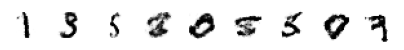

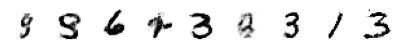

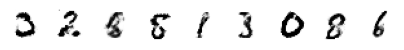

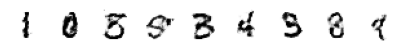

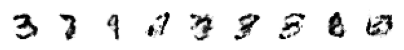

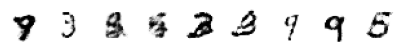

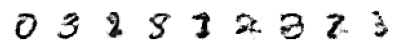

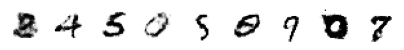

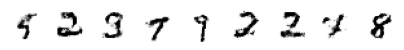

Epoch:180, Step:0, D-Loss:0.572, D-Acc:67.000, G-Loss:1.341
Epoch:180, Step:50, D-Loss:0.485, D-Acc:76.000, G-Loss:1.235
Epoch:180, Step:100, D-Loss:0.524, D-Acc:77.000, G-Loss:1.300
Epoch:180, Step:150, D-Loss:0.569, D-Acc:67.000, G-Loss:1.179
Epoch:180, Step:200, D-Loss:0.465, D-Acc:80.000, G-Loss:1.180
Epoch:180, Step:250, D-Loss:0.488, D-Acc:78.000, G-Loss:1.303
Epoch:180, Step:300, D-Loss:0.498, D-Acc:77.000, G-Loss:1.293
Epoch:180, Step:350, D-Loss:0.476, D-Acc:76.000, G-Loss:1.391
Epoch:180, Step:400, D-Loss:0.580, D-Acc:67.000, G-Loss:1.162
Epoch:180, Step:450, D-Loss:0.521, D-Acc:72.000, G-Loss:1.298
Epoch:181, Step:0, D-Loss:0.591, D-Acc:72.000, G-Loss:1.181
Epoch:181, Step:50, D-Loss:0.612, D-Acc:63.000, G-Loss:1.361
Epoch:181, Step:100, D-Loss:0.494, D-Acc:77.000, G-Loss:1.220
Epoch:181, Step:150, D-Loss:0.524, D-Acc:75.000, G-Loss:1.137
Epoch:181, Step:200, D-Loss:0.611, D-Acc:66.000, G-Loss:1.254
Epoch:181, Step:250, D-Loss:0.497, D-Acc:72.000, G-Loss:1.212
Epoch:181, Ste

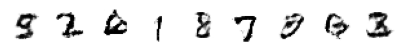

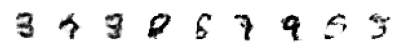

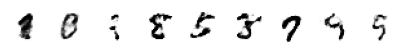

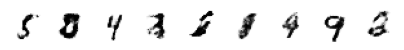

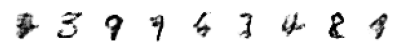

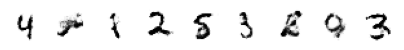

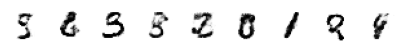

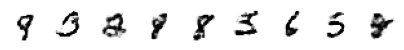

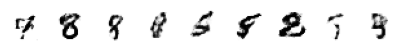

Epoch:190, Step:0, D-Loss:0.434, D-Acc:80.000, G-Loss:1.270
Epoch:190, Step:50, D-Loss:0.535, D-Acc:69.000, G-Loss:1.207
Epoch:190, Step:100, D-Loss:0.577, D-Acc:72.000, G-Loss:1.338
Epoch:190, Step:150, D-Loss:0.592, D-Acc:67.000, G-Loss:1.269
Epoch:190, Step:200, D-Loss:0.549, D-Acc:66.000, G-Loss:1.279
Epoch:190, Step:250, D-Loss:0.600, D-Acc:71.000, G-Loss:1.333
Epoch:190, Step:300, D-Loss:0.516, D-Acc:71.000, G-Loss:1.164
Epoch:190, Step:350, D-Loss:0.435, D-Acc:84.000, G-Loss:1.307
Epoch:190, Step:400, D-Loss:0.504, D-Acc:74.000, G-Loss:1.329
Epoch:190, Step:450, D-Loss:0.564, D-Acc:75.000, G-Loss:1.178
Epoch:191, Step:0, D-Loss:0.473, D-Acc:79.000, G-Loss:1.211
Epoch:191, Step:50, D-Loss:0.444, D-Acc:81.000, G-Loss:1.398
Epoch:191, Step:100, D-Loss:0.484, D-Acc:77.000, G-Loss:1.267
Epoch:191, Step:150, D-Loss:0.518, D-Acc:75.000, G-Loss:1.235
Epoch:191, Step:200, D-Loss:0.619, D-Acc:69.000, G-Loss:1.371
Epoch:191, Step:250, D-Loss:0.529, D-Acc:78.000, G-Loss:1.195
Epoch:191, Ste

In [11]:
epochs = 200
batch_size = 100
steps = 500
noise_size = 50

for i in range(0, epochs):
    if (i%10 == 0):
        show_generator_results(generator_network)
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))
        
        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)
        
        gan_input = get_random_noise(batch_size, noise_size)
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))
        
        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = gan_model.train_on_batch(gan_input, gan_output)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))
            

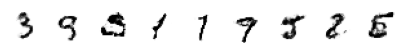

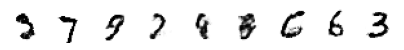

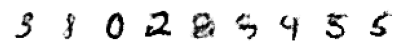

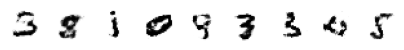

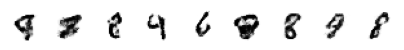

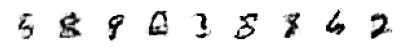

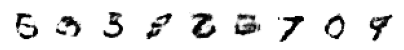

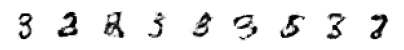

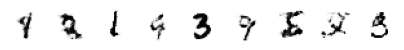

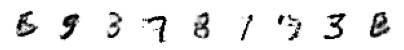

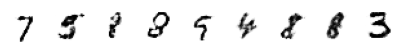

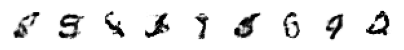

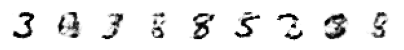

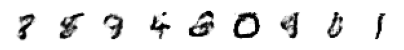

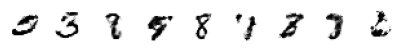

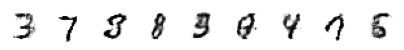

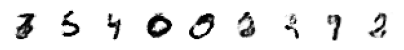

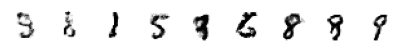

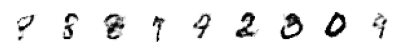

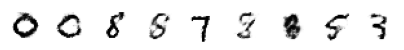

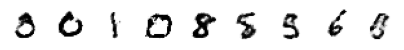

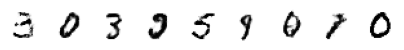

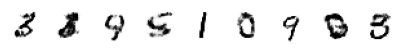

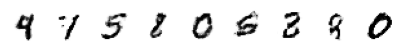

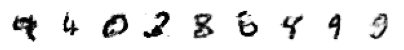

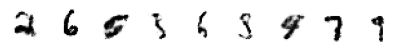

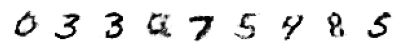

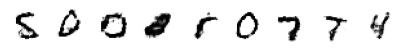

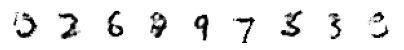

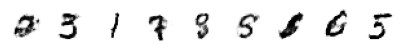

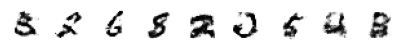

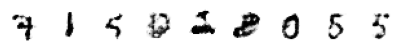

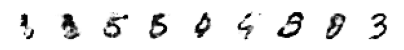

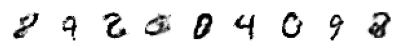

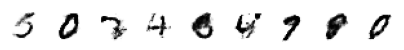

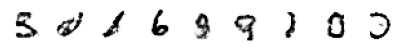

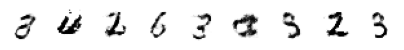

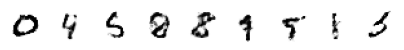

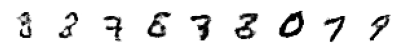

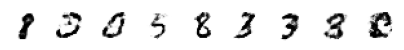

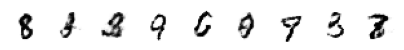

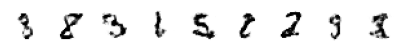

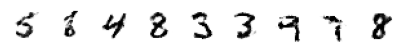

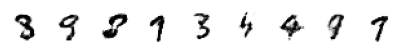

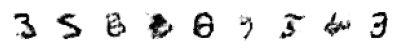

In [12]:
#Generating Unlimited samples
for i in range(5):
    show_generator_results(generator_network)